<a href="https://colab.research.google.com/github/Ghost7600/Sinais-e-Sistemas/blob/main/2_Kenner_Series_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as py
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

Qual a Função desejada? Entre '1' para onda trapezoidal ou '2' para onda quadrada: 2
Quantas harmônicas deseja? 20
Deseja plotar todas as harmonicas no grafico (1) ou apenas a reconstrução(0)? 1


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


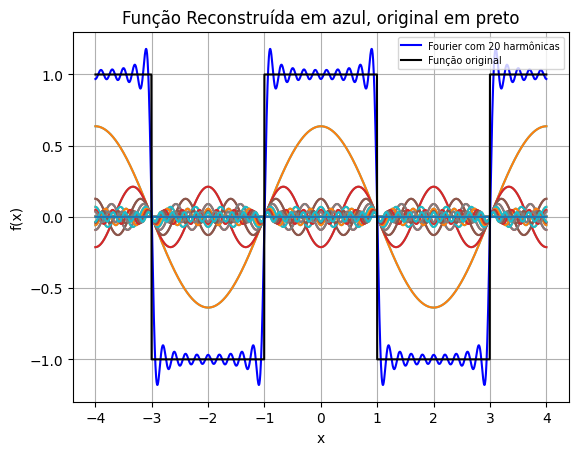

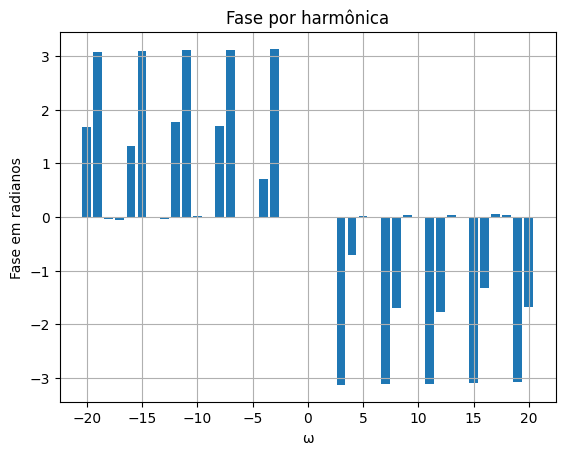

2000


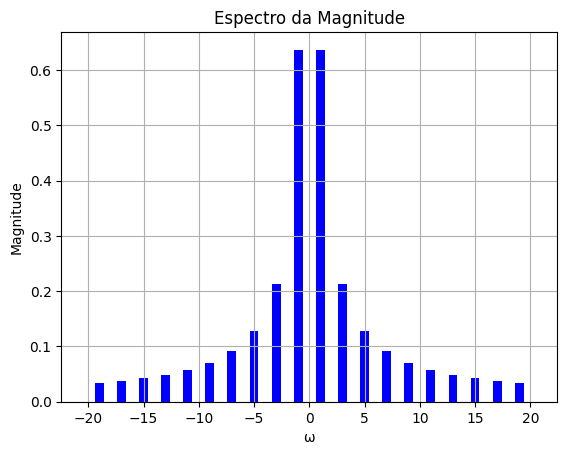

In [ ]:
#Kenner Marqueti Couto
#Trabalho de Series de Fourrier

#Materiais de Apoio
# Data Driven Science & Engineering
#Machine Learning, Dynamical Systems, and Control
#Steven L. Brunton, J. Nathan Kutz
# http://databookuw.com/databook.pdf

# https://www.youtube.com/watch?v=dZrShAGqT44&ab_channel=SteveBrunton

# https://github.com/dynamicslab/databook_python/blob/master/CH02/CH02_SEC01_1_FourierSines.ipynb

# https://computationalmindset.com/en/mathematics/fourier-series-in-python.html


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from numpy import pi


############      Parâmetros para as Figuras       ################
#plt.figure(dpi=100)
#plt.rcParams['figure.figsize'] = [4,4]
#plt.rcParams.update({'font.size':18})


############  Definindo Funções  ############

L = 1 # preíodo padrão, pode ser redefinido posteriormente

def square_wave(x, offset_x=0, offset_y=0, height=1, period=4):
    x = x - offset_x
    omega = 2 * np.pi / period
    quadrado = np.where(np.sin(omega * (x))>= 0, 1, 0)
    return quadrado * height + offset_y 

def trapeze_wave(x, offset_x=0, offset_y=0, period=6):
    x_normalized = (x - offset_x) % period
    y = np.where(x_normalized <= 1, x_normalized, np.where(x_normalized <= 3, 1, np.where(x_normalized <= 4, 4 - x_normalized, 0)))
    return y + offset_y

def triangle_wave(f, period = L, height = 1):
    f = f % period # make x value always between 0 and period
    return f * (height/period) # simple a*t line slope


def cutted_wave(x, period = L, height = 1 , ratio = 1):
    x = x % period # make x value always between 0 and period
    result = []

    for t in x:
        if (t > period/ratio):
            result.append(0) # zeroed part of the function
        else:
            # weighted ratio a*t line slope
            result.append(t * (height*ratio/period)) 
            
    return np.asarray(result) # return single value, or vector with size of x


########################  Defininto passo de cálculo, período da função e criando eixo x  ########################

# Pergunta ao usuário função desejada
choice = input("Qual a Função desejada? Entre '1' para onda trapezoidal ou '2' para onda quadrada: ")

# Define f based on user's choice
if choice == '1':
    L = 6
    dx = 0.001
    x = L * np.arange(-1+dx,1+dx,dx) #cria vetor do eixo x
    f = np.zeros_like(x) # Cria vetor que irá receber a função #
    f = trapeze_wave(x,-2) ;
elif choice == '2':
    dx = 0.001
    L = 4
    x = L * np.arange(-1+dx,1+dx,dx)
    f = np.zeros_like(x)
    f = square_wave(x,3,-1,2,L)
elif choice == '3':
    dx = 0.001
    L = 2*np.pi
    x = L * np.arange(-1+dx,1+dx,dx)
    f = np.zeros_like(x)
    f = triangle_wave(x,2*np.pi,1)
else:
    L = 6
    print('voce não deveria estar aqui')
    dx = 0.001
    x = L * np.arange(-1+dx,1+dx,dx)
    f = np.zeros_like(x)
    print("Escolha inválida. Utilizando onda trapezoidal.")
    f = trapeze_wave(x,-2)

########################    HARMONICAS E VETORES     ###############################
choice2 = 0
harm = int(input("Quantas harmônicas deseja? ")) #Pede ao usuário nº de harmônicas
choice2 = int(input("Deseja plotar todas as harmonicas no grafico (1) ou apenas a reconstrução(0)? "))
if choice2 != 0 and choice2 != 1:
  print('escolha invalida, plotando apenas reconstrução')
  choice2 = 0

C = np.zeros(2*harm + 1, dtype=np.complex128) # Criando vetor para os Coeficientes 
#de Fourier, criamos 2*harm+1 pois estamos calculando harmônicas positivas e negativas
angk = np.zeros(2*harm+1) # Criando vetor para ângulo da harmônica
amplk = np.zeros(2*harm+1) # Criando vetor para amplitude da harmônica


########    Calculando a série de Fourier através da identidade de euler    #######
fFS = np.zeros_like(x, dtype=np.complex128)
temp = np.zeros_like(x, dtype=np.complex128)
for k in range(-harm,harm+1):
    C[k] = np.sum(f * np.exp(-1j * k * 2 * np.pi * x / L)) * dx #integral calculada de forma numérica cn = (1/P)*int(f(t)e^(-jwt/P)
    temp = C[k] * np.exp(-1j * k * 2 * np.pi * x / L)/2  #variavel temporária caso deseje plotar cada coeficiente individualmente
    fFS += C[k] * np.exp(-1j * k * 2 * np.pi * x / L)/2  #Somatório de todas as harmônicas, como foi utilizado dois períodos, faz-se necessário dividir por 2
    if choice2 == 1:
      plt.plot(x,temp)
    angk[k+harm] = np.angle(C[k]) # como o elemento 0 do vetor angk é correspondente à hamrmônica -harm, por exemplo -10, 
    amplk[k+harm] = np.abs(C[k])/2 # /2 pois estasmos usando dois períodos


# Create a line plot
plt.plot(x,np.real(fFS),color='b',label= ("Fourier com %d harmônicas" % harm))
plt.plot(x,f,color='k',label= ("Função original"))

# Customize the plot
#plt.figure(figsize=(8, 6))
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.xticks([-3,-2,-1,0,1,2,3])
plt.title('Função Reconstruída em azul, original em preto')
plt.legend(loc='upper right', fontsize='x-small')
plt.grid()
# Display the plot
plt.show()

# Create a line plot
eixoh = np.arange(-harm,harm+1, 1)

############################## Angulo das harmonicas
plt.bar(eixoh, angk)
plt.title('Angulo das harmônicas')
plt.grid()
# Customize the plot
plt.xlabel('\u03C9')
plt.ylabel('Fase em radianos')
plt.title('Fase por harmônica')

# Display the plot
plt.show()


############### Amplitude das harmonicas

# Create a line plot

plt.bar(eixoh, amplk,color='b')
plt.grid()

# Filter the x and y values where y is not 0
nonzero_indices = np.where(amplk > 0.01)

nonzero_y = eixoh[nonzero_indices]


# Customize the plot
#plt.yscale('log')
plt.xlabel('\u03C9')
plt.ylabel('Magnitude')
plt.title('Espectro da Magnitude')
print(len(x))

# Display the plot
plt.show()

